# Objective

To predict wage from level of skills within certain wage ranges. Ultimately, this could help identify trainings to upskill certain worker classes.


# Exploratory data analysis

import data


In [1]:
import matplotlib.pyplot as plt

% matplotlib inline
import pandas as pd
import numpy as np

# Read the data into a DataFrame
path = 'skill_and_wages4.csv'
skills = pd.read_csv(path)

In [2]:
skills.head()
skills.nunique()
skills.describe()
skills.dtypes

#check out data
#median annual wage is not a float, will need to change this

SOC                                      object
occupation_cat                           object
line_item                                object
employment_2016                         float64
employment_2026                         float64
employment_change_2016-26_#             float64
employment_change_2016-26_%             float64
percent_self_employed_2016               object
occupational_openings_2016-26_annual    float64
wage                                     object
reading_comprehension                   float64
active_listening                        float64
writing                                 float64
speaking                                float64
mathematics                             float64
science                                 float64
critical_thinking                       float64
active_learning                         float64
learning_strategies                     float64
monitoring                              float64
social_perceptiveness                   

In [3]:
wage = skills.loc[:,'wage']
skills.loc[:,'wage']= wage
skills.head()

,SOC,occupation_cat,line_item,employment_2016,employment_2026,employment_change_2016-26_#,employment_change_2016-26_%,percent_self_employed_2016,occupational_openings_2016-26_annual,wage,...,troubleshooting,repairing,quality_control_analysis,judgment_and_decision_making,systems_analysis,systems_evaluation,time_management,management_of_financial_resources,management_of_material_resources,management_of_personnel_resources
0,00-0000,"Total, all occupations",Summary,156063.8,167582.3,11518.6,7.4,6.1,18740.3,37040,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,11-0000,Management occupations,Summary,9533.1,10411.5,878.3,9.2,19.8,851.2,100790,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,11-1000,Management occupations,Summary,2627.5,2826.6,199.1,7.6,3.2,235.3,102320,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,43-9061,Office and administrative support occupations,Line item,3117.7,3085.7,-32.1,-1.0,0.4,356.2,30580,...,0.12,0.0,0.50,2.12,1.88,1.38,2.75,1.38,1.62,2.25
4,51-2092,Production occupations,Line item,1130.9,987.9,-143.0,-12.6,1.4,107.7,30060,...,2.00,1.5,2.75,2.62,1.88,1.75,2.50,0.62,0.75,2.38


In [4]:
wage_not_num = skills.loc[:,'wage'].str.isnumeric() ==False

skills.loc[wage_not_num,:]
#its only a few rows....going to just remove since they are outliers in the data anyway and not as pertinent to the analysis (>$200k)


,SOC,occupation_cat,line_item,employment_2016,employment_2026,employment_change_2016-26_#,employment_change_2016-26_%,percent_self_employed_2016,occupational_openings_2016-26_annual,wage,...,troubleshooting,repairing,quality_control_analysis,judgment_and_decision_making,systems_analysis,systems_evaluation,time_management,management_of_financial_resources,management_of_material_resources,management_of_personnel_resources
191,27-2011,"Arts, design, entertainment, sports, and media...",Line item,63.8,71.3,7.5,11.7,25.8,7.4,—,...,0.00,0.00,0.000,3.00,1.620,1.620,3.000,0.000,0.00,2.380
364,27-2040,"Arts, design, entertainment, sports, and media...",Summary,247.3,263.2,15.9,6.4,32.4,25.7,—,...,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
406,29-1060,Healthcare practitioners and technical occupat...,Summary,713.8,820.3,106.5,14.9,6.7,30.4,">=$208,000",...,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
587,27-2099,"Arts, design, entertainment, sports, and media...",Line item,26.7,28.9,2.1,8.0,50.2,3.2,—,...,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.00,0.000
677,27-2042,"Arts, design, entertainment, sports, and media...",Line item,172.4,183.8,11.3,6.6,35.3,18.0,—,...,0.44,0.19,1.065,2.81,2.065,2.125,2.625,0.875,1.00,2.185
750,29-1067,Healthcare practitioners and technical occupat...,Line item,45.0,52.6,7.6,16.8,7.6,2.0,">=$208,000",...,1.50,0.00,2.620,4.88,3.380,3.500,3.880,1.880,2.25,3.620
786,29-1061,Healthcare practitioners and technical occupat...,Line item,33.0,38.9,5.9,17.8,7.7,1.5,">=$208,000",...,2.25,0.00,2.620,4.25,3.250,3.250,4.000,2.250,2.25,3.500
825,29-1064,Healthcare practitioners and technical occupat...,Line item,21.7,25.5,3.9,17.9,7.6,1.0,">=$208,000",...,0.25,0.00,1.000,4.38,3.120,3.000,3.880,1.750,2.00,3.500
904,27-2031,"Arts, design, entertainment, sports, and media...",Line item,13.5,14.1,0.7,5.0,26.8,1.9,—,...,0.00,0.00,0.120,2.38,2.250,1.880,2.500,0.000,0.00,2.380
988,29-1022,Healthcare practitioners and technical occupat...,Line item,6.8,7.9,1.2,17.2,19.8,0.3,">=$208,000",...,1.50,1.25,2.620,4.12,3.250,3.500,3.250,1.500,1.50,3.120


In [5]:
wage_num = skills.loc[:,'wage'].str.isnumeric()

skills = skills.loc[wage_num,:]

In [6]:
skills.describe(include= ['object'])

skills.shape

#1091 > 1080 so these rows were indeed removed 

(1080, 45)

In [7]:
skills.wage = pd.to_numeric(skills['wage'])
#yay! wage is now numeric

skills.dtypes

SOC                                      object
occupation_cat                           object
line_item                                object
employment_2016                         float64
employment_2026                         float64
employment_change_2016-26_#             float64
employment_change_2016-26_%             float64
percent_self_employed_2016               object
occupational_openings_2016-26_annual    float64
wage                                      int64
reading_comprehension                   float64
active_listening                        float64
writing                                 float64
speaking                                float64
mathematics                             float64
science                                 float64
critical_thinking                       float64
active_learning                         float64
learning_strategies                     float64
monitoring                              float64
social_perceptiveness                   

In [8]:
skills.isnull().sum()
#no null values so that is good

SOC                                     0
occupation_cat                          0
line_item                               0
employment_2016                         0
employment_2026                         0
employment_change_2016-26_#             0
employment_change_2016-26_%             0
percent_self_employed_2016              0
occupational_openings_2016-26_annual    0
wage                                    0
reading_comprehension                   0
active_listening                        0
writing                                 0
speaking                                0
mathematics                             0
science                                 0
critical_thinking                       0
active_learning                         0
learning_strategies                     0
monitoring                              0
social_perceptiveness                   0
coordination                            0
persuasion                              0
negotiation                       

In [9]:
#noticed 'summary' rows when looked at head of data, need to remove these since they have all zero values so might throw off data
#remove summary rows

line_item = (skills.loc[:,'line_item'] == 'Line item')
clean_skills = skills.loc[line_item,:]

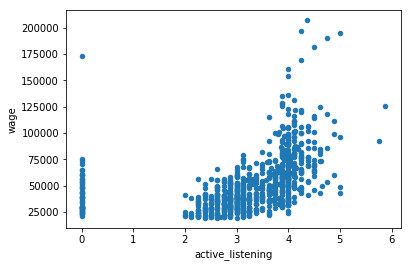

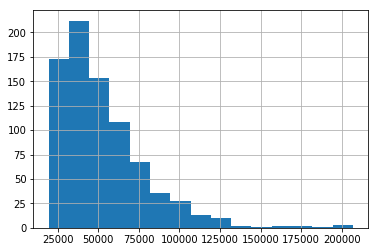

In [10]:
fig, ax = plt.subplots()
clean_skills.plot(kind='scatter',x='active_listening',y='wage',ax=ax);
#as an example, active listening has a slight correlation with wage

fig, ax = plt.subplots()

clean_skills.loc[:,'wage'].hist(bins=15,ax=ax);  

In [11]:
#create a new column that totals the values of all 35 skills for each SOC
clean_skills.loc[:,'total'] = clean_skills.loc[:,['reading_comprehension',
       'active_listening', 'writing', 'speaking', 'mathematics', 'science',
       'critical_thinking', 'active_learning', 'learning_strategies',
       'monitoring', 'social_perceptiveness', 'coordination', 'persuasion',
       'negotiation', 'instructing', 'service_orientation',
       'complex_problem_solving', 'operations_analysis', 'technology_design',
       'equipment_selection', 'installation', 'programming',
       'operation_monitoring', 'operation_and_control',
       'equipment_maintenance', 'troubleshooting', 'repairing',
       'quality_control_analysis', 'judgment_and_decision_making',
       'systems_analysis', 'systems_evaluation', 'time_management',
       'management_of_financial_resources', 'management_of_material_resources',
       'management_of_personnel_resources']].sum(axis=1)

C:\Users\Michelle Fasano\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Michelle Fasano\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
clean_skills.head()
non_zeros = (clean_skills.loc[:,'total'] != 0)
non_zeros.sum()
# only 48 have zero for all skills, will remove these

762

In [13]:
clean_skills = clean_skills.loc[non_zeros,:] 

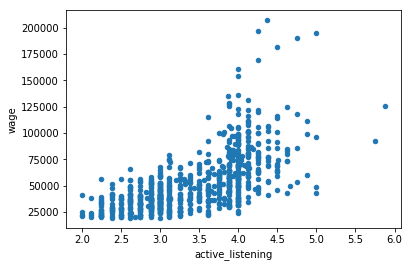

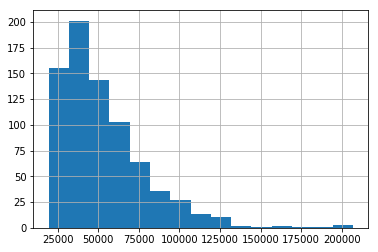

In [14]:
fig, ax = plt.subplots()
clean_skills.plot(kind='scatter',x='active_listening',y='wage',ax=ax);
#as an example, active listening has a slight correlation with wage

fig, ax = plt.subplots()

clean_skills.loc[:,'wage'].hist(bins=15,ax=ax); 

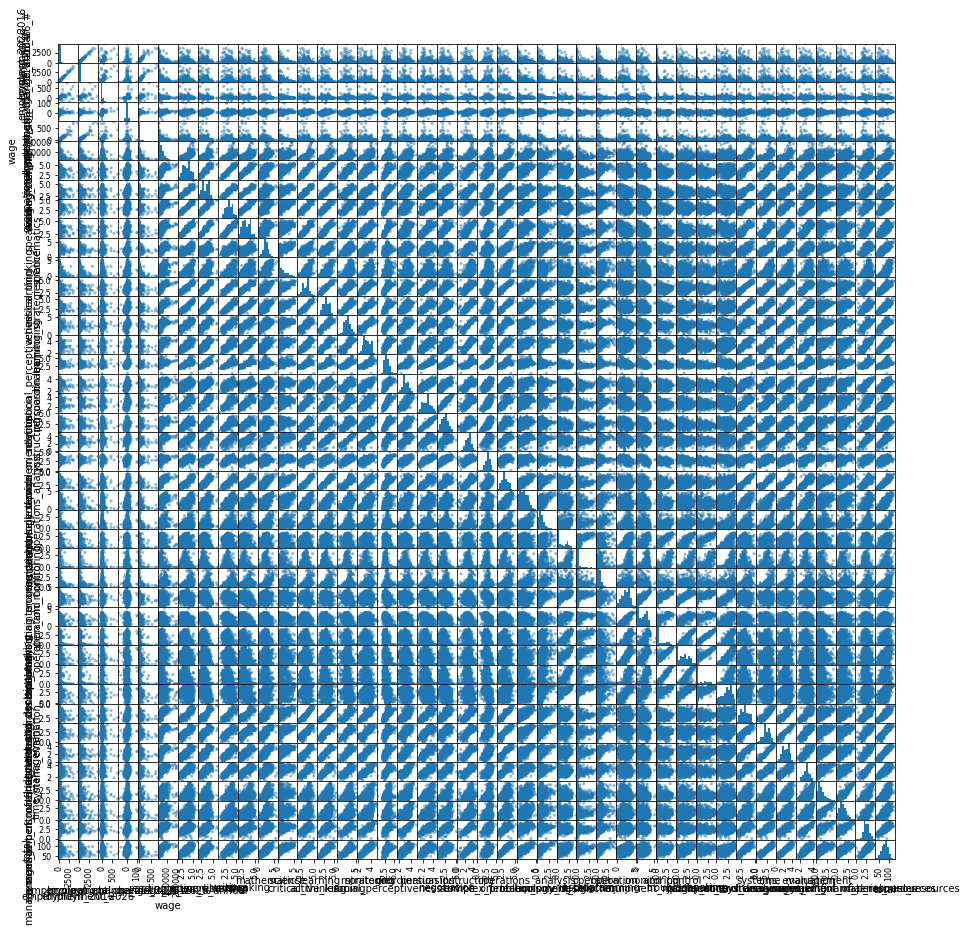

In [15]:
axes = pd.plotting.scatter_matrix(clean_skills, figsize=(15,15));

In [16]:
#The pairplot is very hard to read, lets try a corr matrix instead

corr_matrix = clean_skills.corr()
corr_matrix

type(corr_matrix)
corr_matrix.loc['wage',:].sort_values(ascending=False) 

wage                                    1.000000
complex_problem_solving                 0.747764
judgment_and_decision_making            0.745178
active_learning                         0.702055
critical_thinking                       0.699187
reading_comprehension                   0.689610
systems_evaluation                      0.675768
systems_analysis                        0.666253
total                                   0.664462
monitoring                              0.649587
writing                                 0.641973
time_management                         0.640175
active_listening                        0.638498
speaking                                0.622027
operations_analysis                     0.613284
instructing                             0.594266
science                                 0.582645
management_of_personnel_resources       0.573052
learning_strategies                     0.562246
persuasion                              0.543597
mathematics         

In [17]:
#the top correalted skills to wage are science, operations analysis, systems evalution, systems analysis,programming, and management of financial resources. I want to focus on skills that can be devleped without a college degree, therefor the next step is to remove the highest wages from the data

lower_wage = (clean_skills.loc[:,'wage'] <40000)
new_skills = clean_skills.loc[lower_wage,:]
corr_matrix_new = new_skills.corr()
corr_matrix_new.loc['wage',:].sort_values(ascending=False)

wage                                    1.000000
total                                   0.523213
complex_problem_solving                 0.498252
time_management                         0.427719
judgment_and_decision_making            0.408819
systems_analysis                        0.399990
critical_thinking                       0.386085
systems_evaluation                      0.377161
reading_comprehension                   0.369646
mathematics                             0.367478
operations_analysis                     0.355697
monitoring                              0.350934
active_learning                         0.350927
technology_design                       0.343460
programming                             0.335761
equipment_selection                     0.335380
repairing                               0.331429
quality_control_analysis                0.315763
equipment_maintenance                   0.315614
writing                                 0.310355
science             

In [18]:
print(new_skills.shape)
skills.shape

(306, 46)


(1080, 45)

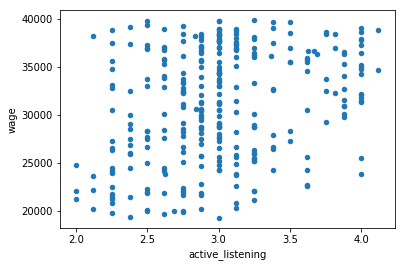

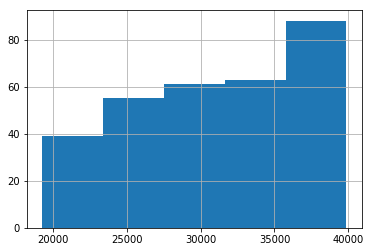

In [19]:
#let's see how those same charts look with this smaller data set of lower wages only
fig, ax = plt.subplots()
new_skills.plot(kind='scatter',x='active_listening',y='wage',ax=ax);

fig, ax = plt.subplots()
new_skills.loc[:,'wage'].hist(bins=5,ax=ax);

In [20]:
#for 40,000 salary or less,  programming, operations analysis, equippment selelction, repairing, maintenance become the most important. Let's see if these features are correlated with each other
top_skills = ['complex_problem_solving','time_management','judgment_and_decision_making','systems_analysis','critical_thinking']
corr_matrix_new.loc[top_skills,top_skills]

,complex_problem_solving,time_management,judgment_and_decision_making,systems_analysis,critical_thinking
complex_problem_solving,1.000000,0.723253,0.830101,0.729999,0.759086
time_management,0.723253,1.000000,0.722856,0.658288,0.651074
judgment_and_decision_making,0.830101,0.722856,1.000000,0.689954,0.792961
systems_analysis,0.729999,0.658288,0.689954,1.000000,0.648095
critical_thinking,0.759086,0.651074,0.792961,0.648095,1.000000


# Model buildling

First let's build a baseline model

In [21]:
#get the r^2 of the mean first to serve as our baseline
from sklearn import metrics
import numpy as np
mean = []
wage = new_skills.loc[:,'wage']
x =0
while x < len(wage):
    mean.append(pd.Series([new_skills.loc[:,'wage'].mean()]))
    x+=1

mean = pd.Series(mean)
print(metrics.r2_score(wage,mean))
mse_baseline = metrics.mean_squared_error(wage,mean)
rmse_baseline = np.sqrt(mse_baseline)
rmse_baseline




0.0


5804.033126264766

Linear Regression, top two features

In [22]:
#these are all closely correlated so I'm going to just do a linear regression on the top two
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr_new_skills = LinearRegression()
feature_cols = ['time_management','complex_problem_solving']
X = new_skills.loc[:,feature_cols]
Y = new_skills.loc[:,'wage']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=123)
lr_new_skills.fit(X_train,Y_train)
Y_pred = lr_new_skills.predict(X_test)

mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(rmse)
metrics.r2_score(Y_test,Y_pred)

4878.501524507865


0.27746669601453133

Linear regression, all variables

In [23]:
#linear regression for all variables for comparison

new_skills.columns

feature_cols_two = ['reading_comprehension',
       'active_listening', 'writing', 'speaking', 'mathematics', 'science',
       'critical_thinking', 'active_learning', 'learning_strategies',
       'monitoring', 'social_perceptiveness', 'coordination', 'persuasion',
       'negotiation', 'instructing', 'service_orientation',
       'complex_problem_solving', 'operations_analysis', 'technology_design',
       'equipment_selection', 'installation', 'programming',
       'operation_monitoring', 'operation_and_control',
       'equipment_maintenance', 'troubleshooting', 'repairing',
       'quality_control_analysis', 'judgment_and_decision_making',
       'systems_analysis', 'systems_evaluation', 'time_management',
       'management_of_financial_resources', 'management_of_material_resources',
       'management_of_personnel_resources']

lr_all = LinearRegression()
X_all = new_skills.loc[:,feature_cols_two]
Y_all = new_skills.loc[:,'wage']

X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(X_all,Y_all,random_state=123)
lr_all.fit(X_train_all,Y_train_all)
Y_pred_all = lr_all.predict(X_test_all)

mse_all = metrics.mean_squared_error(Y_test_all, Y_pred_all)
rmse_all = np.sqrt(mse_all)
print(rmse_all)
metrics.r2_score(Y_test_all,Y_pred_all)

4165.089432438696


0.47333598959318535

Decision Tree

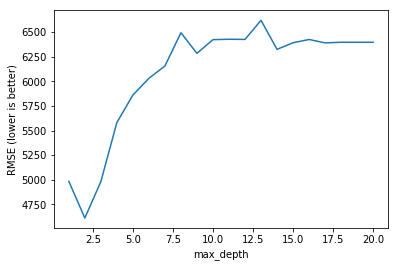

In [24]:
#Let's try decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
RMSE_scores = []

X_dt = new_skills.loc[:,feature_cols_two]
Y_dt = new_skills.loc[:,'wage']

X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt,Y_dt,random_state=123)

max_depth_range = list(range(1, 21))
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X_train_dt, Y_train_dt, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

#2 is best

In [25]:
RMSE_scores

[4985.36911549646,
 4612.520135411076,
 4980.943941410425,
 5581.042060862383,
 5860.388715681665,
 6030.54863211717,
 6155.219972836509,
 6492.753950281285,
 6283.8146789588955,
 6422.75946975863,
 6426.7911986628,
 6425.285094812452,
 6618.800975916192,
 6324.363477397191,
 6391.040554639188,
 6424.466193486985,
 6389.911681692049,
 6396.210120023965,
 6396.210120023965,
 6396.210120023965]

In [26]:
treereg_real = DecisionTreeRegressor(max_depth=2, random_state=1)
treereg_real.fit(X_train_dt,Y_train_dt)
Y_pred_dt = treereg_real.predict(X_test_dt)

In [27]:
mse_dt = metrics.mean_squared_error(Y_test_dt, Y_pred_dt)
rmse_one_dt = np.sqrt(mse_dt)
print(rmse_one_dt)
metrics.r2_score(Y_test_dt,Y_pred_dt)

5324.684331419852


0.13925856031178818

Random Forest

In [28]:
#let's try random forest
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=150, max_features=11, oob_score=True, random_state=1)


X_rf = new_skills.loc[:,feature_cols_two]
Y_rf = new_skills.loc[:,'wage']

X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X_rf,Y_rf,random_state=123)


rfreg.fit(X_train_rf, Y_train_rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=11, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [29]:
Y_pred_rf = rfreg.predict(X_test_rf)
mse_rf = metrics.mean_squared_error(Y_test_rf, Y_pred_rf)
rmse_one_rf = np.sqrt(mse_rf)
print(rmse_one_rf)
print((rfreg.oob_score_))
metrics.r2_score(Y_test_rf,Y_pred_rf)

4473.010699128339
0.42286218801280906


0.39258592125285585

Random Forest just top features

In [30]:
#let's try random forest with just top features (above mean) 

important_features = pd.DataFrame({'feature':feature_cols_two, 'importance':rfreg.feature_importances_}).sort_values(by='importance')
important_features.loc[:,'importance'].mean()
most_important = (important_features.loc[:,'importance'] > -0.2857)
most_important_features  = important_features.loc[most_important,'feature']
most_important_features_list = list(most_important_features)
important_features.sort_values(by='importance',ascending=False)

,feature,importance
17,operations_analysis,0.100074
16,complex_problem_solving,0.083735
22,operation_monitoring,0.056243
25,troubleshooting,0.046723
27,quality_control_analysis,0.044896
31,time_management,0.041581
0,reading_comprehension,0.036712
28,judgment_and_decision_making,0.036104
23,operation_and_control,0.034984
21,programming,0.034098


In [31]:
rfreg_imp = RandomForestRegressor(n_estimators=150, max_features=6, oob_score=True, random_state=1)


X_rf_imp = new_skills.loc[:,most_important_features_list]
Y_rf_imp = new_skills.loc[:,'wage']

X_train_rf_imp, X_test_rf_imp, Y_train_rf_imp, Y_test_rf_imp = train_test_split(X_rf_imp,Y_rf_imp,random_state=123)
rfreg_imp.fit(X_train_rf_imp, Y_train_rf_imp)

Y_pred_rf_imp = rfreg_imp.predict(X_test_rf_imp)
mse_rf_imp = metrics.mean_squared_error(Y_test_rf_imp, Y_pred_rf_imp)
rmse_rf_imp = np.sqrt(mse_rf_imp)
print(rmse_rf_imp)
print((rfreg_imp.oob_score_))
metrics.r2_score(Y_test_rf_imp,Y_pred_rf_imp)

#this is better than the full random forest model

4379.3847094233815
0.42249347648445956


0.4177477502054482

In [32]:
#Since complex problem solving is the most important feature, I want to just check out the avg score for this across all the occupation categories
new_skills.groupby(['occupation_cat'])['complex_problem_solving'].mean()

occupation_cat
Arts, design, entertainment, sports, and media occupations    3.039000
Building and grounds cleaning and maintenance occupations     2.481429
Business and financial operations occupations                 2.935000
Community and social service occupations                      3.500000
Construction and extraction occupations                       2.510000
Education, training, and library occupations                  2.810000
Farming, fishing, and forestry occupations                    2.361111
Food preparation and serving related occupations              2.241667
Healthcare practitioners and technical occupations            2.915556
Healthcare support occupations                                2.626000
Installation, maintenance, and repair occupations             2.853409
Life, physical, and social science occupations                3.315000
Office and administrative support occupations                 2.597770
Personal care and service occupations                         

# Conclusions

Overall, the sum of your skills values (total column) is most highly correlated with wage for the 0-40k$ wage range (although this does not mean causation). Complex problem solving & time management are next, but the model that performs best is one that takes into account all 35 skills and runs a regression. 

Its also interesting to note that with feature importances, complex problem solving was also a top skill, but other ones surfaced such as operations analysis and troubleshooting. These more tactical, specific skills is what I was hoping to see, as it is more actionable/ trainable (if causality can be proven).

Even so, the best model is still $4000 off from actual wage on average (using the mean is only $5000 off).

Next Steps:

PCA analysis would be a good follow up (didn’t have time)

A more detailed dataset with more specific skill sets (i.e. bartending experience) could be helpful 

Would also be helpful to know the # of people in each SOC (SOC groups with lots of different SOC codes but similar skills sets skew the data – i.e. lots of types of mechanics)

Finally, I would want to use these results to predict 2017 or 2018 data to see how it performs.
